# AUTOMOTIVE INDUSTRY DATA ANALYSIS

## Goals of This Project.

1. Data cleaning including missing values
2. Data analysis and Visualization 
3. Determining the relationship among different attributes

## Overview
 0. Problem Statement
 1. Brief Discription of Dataset
 4. Handling Missing Values
 3. Exploratory Data Analysis and Visualization
 4. Conclusion


### Problem Statement: Develop an application to demonstrate how the Automotive Industry could harness data to take informed decisions.

### Brief Discription of Dataset


Make: Car's company

Model: Car's Model

Variant: label that is used to describe a particular vehicle

Car Type: Automatic or Manual

Ex-showroom price: it is the price tag at which vehicles are usually advertised.

cylinders:  the more cylinders your engine has, the more power is produced

Emmision: chemicals in exhaust gases that are harmful to air quality

Fuel_Type: vehicles worldwide are powered by gasoline or diesel.

etc.

In [70]:
from ipywidgets import interact

In [71]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

####  Loading the Data

In [2]:
# loading needed methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Using the Pandas method read_csv() to load dataset
cars=pd.read_csv("cars_engage_2022.csv")

#### Summary of Dataset

In [4]:
cars.shape

(1276, 141)

In [5]:
cars.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [6]:
#filtering relevant columns
cars_new=cars[['Make', 'Model', 'Variant', 'Ex-Showroom_Price','City_Mileage', 'Cylinders', 'Highway_Mileage', 
               'Drivetrain','Emission_Norm','Fuel_Type','Body_Type','Kerb_Weight','Gears',
               'Ground_Clearance','Power_Steering','Power','Doors','Type','Audiosystem','Aux-in_Compatibility',
               'Boot_Space','Child_Safety_Locks','Number_of_Airbags']] 

In [7]:
cars_new.head(3)

,Make,Model,Variant,Ex-Showroom_Price,City_Mileage,Cylinders,Highway_Mileage,Drivetrain,Emission_Norm,Fuel_Type,...,Ground_Clearance,Power_Steering,Power,Doors,Type,Audiosystem,Aux-in_Compatibility,Boot_Space,Child_Safety_Locks,Number_of_Airbags
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",23.6 km/litre,2.0,NaN,RWD (Rear Wheel Drive),BS IV,Petrol,...,180 mm,Electric Power,38PS@5500rpm,5.0,Manual,CD Player with USB & Aux-in,Yes,110 litres,Yes,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",23.6 km/litre,2.0,NaN,RWD (Rear Wheel Drive),BS IV,Petrol,...,180 mm,NaN,38PS@5500rpm,5.0,Manual,Not on offer,NaN,110 litres,Yes,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",NaN,2.0,NaN,RWD (Rear Wheel Drive),BS IV,CNG,...,180 mm,Electric Power,38PS@5500rpm,4.0,Manual,Not on offer,NaN,110 litres,Yes,NaN


In [8]:
cars_new.describe()

,Cylinders,Doors,Number_of_Airbags
count,1210.000000,1272.000000,1141.000000
mean,4.380992,4.550314,3.787029
std,1.660957,0.747816,2.522399
min,2.000000,2.000000,1.000000
25%,4.000000,4.000000,2.000000
50%,4.000000,5.000000,2.000000
75%,4.000000,5.000000,6.000000
max,16.000000,5.000000,14.000000


In [9]:
cars_new.dtypes

Make                     object
Model                    object
Variant                  object
Ex-Showroom_Price        object
City_Mileage             object
Cylinders               float64
Highway_Mileage          object
Drivetrain               object
Emission_Norm            object
Fuel_Type                object
Body_Type                object
Kerb_Weight              object
Gears                    object
Ground_Clearance         object
Power_Steering           object
Power                    object
Doors                   float64
Type                     object
Audiosystem              object
Aux-in_Compatibility     object
Boot_Space               object
Child_Safety_Locks       object
Number_of_Airbags       float64
dtype: object

In [10]:
cars_new.shape

(1276, 23)

In [11]:
cars_new.dtypes          #getting the datatypes of the columns

Make                     object
Model                    object
Variant                  object
Ex-Showroom_Price        object
City_Mileage             object
Cylinders               float64
Highway_Mileage          object
Drivetrain               object
Emission_Norm            object
Fuel_Type                object
Body_Type                object
Kerb_Weight              object
Gears                    object
Ground_Clearance         object
Power_Steering           object
Power                    object
Doors                   float64
Type                     object
Audiosystem              object
Aux-in_Compatibility     object
Boot_Space               object
Child_Safety_Locks       object
Number_of_Airbags       float64
dtype: object

### CLEANSING AND PREPARING DATA

In [12]:
cars_new.isnull().sum() #checking number of null values

Make                     75
Model                     0
Variant                   0
Ex-Showroom_Price         0
City_Mileage            555
Cylinders                66
Highway_Mileage         800
Drivetrain                7
Emission_Norm            11
Fuel_Type                 0
Body_Type                 6
Kerb_Weight             365
Gears                   105
Ground_Clearance        289
Power_Steering           57
Power                     0
Doors                     4
Type                      1
Audiosystem              44
Aux-in_Compatibility    284
Boot_Space              249
Child_Safety_Locks       75
Number_of_Airbags       135
dtype: int64

In [13]:
cars_new=cars_new.fillna(method='pad')  #replacing null values by previous entries

In [14]:
cars_new.isnull().sum().sum()    #checking if null values exists

18

In [15]:
cars_new=cars_new.fillna(cars_new['Number_of_Airbags'].mean())

In [16]:
cars_new.isna().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
City_Mileage            0
Cylinders               0
Highway_Mileage         0
Drivetrain              0
Emission_Norm           0
Fuel_Type               0
Body_Type               0
Kerb_Weight             0
Gears                   0
Ground_Clearance        0
Power_Steering          0
Power                   0
Doors                   0
Type                    0
Audiosystem             0
Aux-in_Compatibility    0
Boot_Space              0
Child_Safety_Locks      0
Number_of_Airbags       0
dtype: int64

In [17]:
cars_new.isnull().sum().sum()    

0

In [18]:
cars_new.duplicated().sum()   #checking if it contains duplicate values

8

In [19]:
 cars_new.drop_duplicates(inplace=True)   #removing duplicate values

No null and duplicate values exist.

In [20]:
cars_new['Make'] = cars_new['Make'].astype(str)    #converting datatype of 'Make'

In [21]:
cars_new['Make'] = cars_new['Make'].str.replace('Land Rover Rover', 'Land Rover')  #cleaning the values

In [22]:
cars_new['Ex-Showroom_Price'] = cars_new['Ex-Showroom_Price'].astype(str)
cars_new['Ex-Showroom_Price'] = cars_new['Ex-Showroom_Price'].str.replace(',', '')
cars_new['Ex-Showroom_Price'] = cars_new['Ex-Showroom_Price'].str.replace('Rs.', '')
cars_new['Ex-Showroom_Price'] = cars_new['Ex-Showroom_Price'].astype(int)

In [23]:
cars_new['Ex-Showroom_Price'].head()

0    292667
1    236447
2    296661
3    334768
4    272223
Name: Ex-Showroom_Price, dtype: int32

In [24]:
cars_new['City_Mileage'].unique()

array(['23.6 km/litre', '21.38 km/litre', '25.17 km/litre', '12 km/litre',
       '11 km/litre', '14 km/litre', '19 km/litre', '20.6 km/litre',
       '23 km/litre', '23.84 km/litre', '20.89 km/litre', '15.1 km/litre',
       '13 km/litre', '20 km/litre', '20.3 km/litre', '19.49 km/litre',
       '22,95 km/litre', '17,57 km/litre', '14.6 km/litre',
       '16.3 km/litre', '13.3 km/litre', '18.4 km/litre', '17 km/litre',
       '28,4 km/litre', '28.4 km/litre', '15.3 km/litre', '13,6 km/litre',
       '20.32 km/litre', '13.6 km/litre', '15 km/litre', '16,78 km/litre',
       '18.1 km/litre', '16.78 km/litre', '18 km/litre', '11.2 km/litre',
       '11.3 km/litre', '13.8 km/litre', '12.4 km/litre', '9.5 km/litre',
       '11.5 km/litre', '11.04 km/litre', '13.9 km/litre', '8 km/litre',
       '10.3 km/litre', '12.3 km/litre', '5.7 km/litre', '19.2 km/litre',
       '16 km/litre', '11,44 km/litre', '10 km/litre', '12.8 km/litre',
       '4.5 km/litre', '12.5-12.7 km/litre', '9 km/litre', 

In [27]:
cars_new.drop(cars_new.loc[cars_new['City_Mileage']=='12.5-12.7'].index, inplace=True)

In [28]:
cars_new['City_Mileage'] = cars_new['City_Mileage'].astype(str)
cars_new['City_Mileage'] = cars_new['City_Mileage'].str.replace('km/litre', '').str.strip()
cars_new['City_Mileage'] = cars_new['City_Mileage'].str.replace(',', '.')
cars_new['City_Mileage'] = cars_new['City_Mileage'].astype(float)

In [29]:
cars_new['City_Mileage'].value_counts()

12.00    81
10.20    67
14.00    47
18.00    37
21.20    33
         ..
7.32      1
11.60     1
4.60      1
19.50     1
8.25      1
Name: City_Mileage, Length: 156, dtype: int64

In [30]:
cars_new['Cylinders'].value_counts()

4.0     833
3.0     219
6.0     109
8.0      55
12.0     21
5.0      10
10.0     10
2.0       6
16.0      4
Name: Cylinders, dtype: int64

In [31]:
cars_new['Highway_Mileage'] = cars_new['Highway_Mileage'].astype(str)
cars_new['Highway_Mileage'] = cars_new['Highway_Mileage'].str.replace('km/litre', '').str.strip()
cars_new['Highway_Mileage'] = cars_new['Highway_Mileage'].str.replace(',', '.')
cars_new['Highway_Mileage'] = cars_new['Highway_Mileage'].astype(float)

In [32]:
cars_new['Highway_Mileage'].value_counts()

17.00    106
14.80     63
17.60     51
19.50     45
23.00     39
        ... 
16.70      1
18.90      1
10.20      1
4.38       1
11.56      1
Name: Highway_Mileage, Length: 136, dtype: int64

In [33]:
cars_new['Drivetrain'].value_counts()

FWD (Front Wheel Drive)    880
RWD (Rear Wheel Drive)     169
AWD (All Wheel Drive)      159
4WD                         59
Name: Drivetrain, dtype: int64

In [34]:
cars_new['Emission_Norm'] = cars_new['Emission_Norm'].str.replace('6', 'VI').str.strip()

In [35]:
cars_new['Emission_Norm'].value_counts()

BS IV     880
BS VI     378
BS III      9
Name: Emission_Norm, dtype: int64

In [38]:
cars_new.drop(cars_new.loc[cars_new['Kerb_Weight']=='1016-1043 kg'].index, inplace=True)
cars_new.drop(cars_new.loc[cars_new['Kerb_Weight']=='1053-1080'].index, inplace=True)

In [39]:
cars_new['Kerb_Weight'] = cars_new['Kerb_Weight'].str.replace('kg', '').str.strip()
cars_new['Kerb_Weight'] = cars_new['Kerb_Weight'].astype(int)

In [40]:
cars_new['Gears'].value_counts()

5                              629
6                              268
7                              153
8                              150
9                               35
4                               16
Single Speed Reduction Gear      2
7 Dual Clutch                    1
Name: Gears, dtype: int64

In [41]:
cars_new['Gears'] = cars_new['Gears'].str.replace('Single Speed Reduction Gear', '1').str.strip()
cars_new['Gears'] = cars_new['Gears'].str.replace('7 Dual Clutch', '7').str.strip()
cars_new['Gears'] = cars_new['Gears'].astype(int)

In [42]:
cars_new['Gears'].value_counts()

5    629
6    268
7    154
8    150
9     35
4     16
1      2
Name: Gears, dtype: int64

In [43]:
cars_new['Ground_Clearance'].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

In [44]:
cars_new['Ground_Clearance'] = cars_new['Ground_Clearance'].str.replace('mm', '').str.strip()
cars_new['Ground_Clearance'] = cars_new['Ground_Clearance'].astype(float)

In [45]:
cars_new.drop(cars_new.loc[cars_new['Boot_Space']=='209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded)'].index, inplace=True)

In [46]:
cars_new['Boot_Space'] = cars_new['Boot_Space'].astype(str)

In [47]:
cars_new['Boot_Space'] = cars_new['Boot_Space'].str.replace('.', '').str.strip()
cars_new['Boot_Space'] = cars_new['Boot_Space'].str.replace(' litres', '').str.strip()

In [48]:
cars_new['Boot_Space'].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       '242', '240', '260', '625', '454', '251', '210', '407', '320',
       '316', '285', '280', '378', '257', '330', '592', '339', '354',
       '438', '615', '522', '150', '425', '488', '470', '460', '278',
       '215', '432', '360', '480', '455', '505', '520', '560', '550',
       '650', '1025', '540', '465', '515', '500', '605', '530', '510',
       '580', '261', '133', '616', '358', '430', '230', '490', '443',
       '395', '20', '256', '243', '268', '345', '419', '390', '420',
       '350', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347',
       '209(All3RowsUp)550(3rdRowFolded)&803(2ndRowand3rdRowFolded)',
       '363', '375', '392', '433', '981', '586',

In [49]:
cars_new.drop(cars_new.loc[cars_new['Boot_Space']=='209(All3RowsUp)550(3rdRowFolded)&803(2ndRowand3rdRowFolded)'].index, inplace=True)

In [50]:
cars_new['Boot_Space'] = cars_new['Boot_Space'].astype(int)

In [51]:
cars_new['Number_of_Airbags'].unique()

array([ 3.69857595,  1.        ,  2.        ,  4.        ,  6.        ,
        9.        ,  8.        ,  7.        , 10.        ,  5.        ,
        3.        , 14.        ])

In [52]:
cars_new['Number_of_Airbags'] = cars_new['Number_of_Airbags'].astype(str)

In [53]:
cars_new.drop(cars_new.loc[cars_new['Number_of_Airbags']=='3698575949367088e+31'].index, inplace=True)
cars_new.drop(cars_new.loc[cars_new['Number_of_Airbags']=='3.6985759493670884'].index, inplace=True)

In [54]:
cars_new['Number_of_Airbags'] = cars_new['Number_of_Airbags'].str.replace('000', '').str.strip()
cars_new['Number_of_Airbags'] = cars_new['Number_of_Airbags'].str.replace('0', '').str.strip()
cars_new['Number_of_Airbags'] = cars_new['Number_of_Airbags'].astype(float)

In [55]:
cars_new['Number_of_Airbags'].value_counts()

2.0     693
6.0     204
8.0      94
1.0      87
7.0      65
4.0      47
9.0      22
3.0      17
14.0      3
5.0       1
Name: Number_of_Airbags, dtype: int64

In [56]:
cars_new.to_csv('engage_dataset.csv')    #saving dataset after cleaning

### Exploratory Data Analysis and Visualization

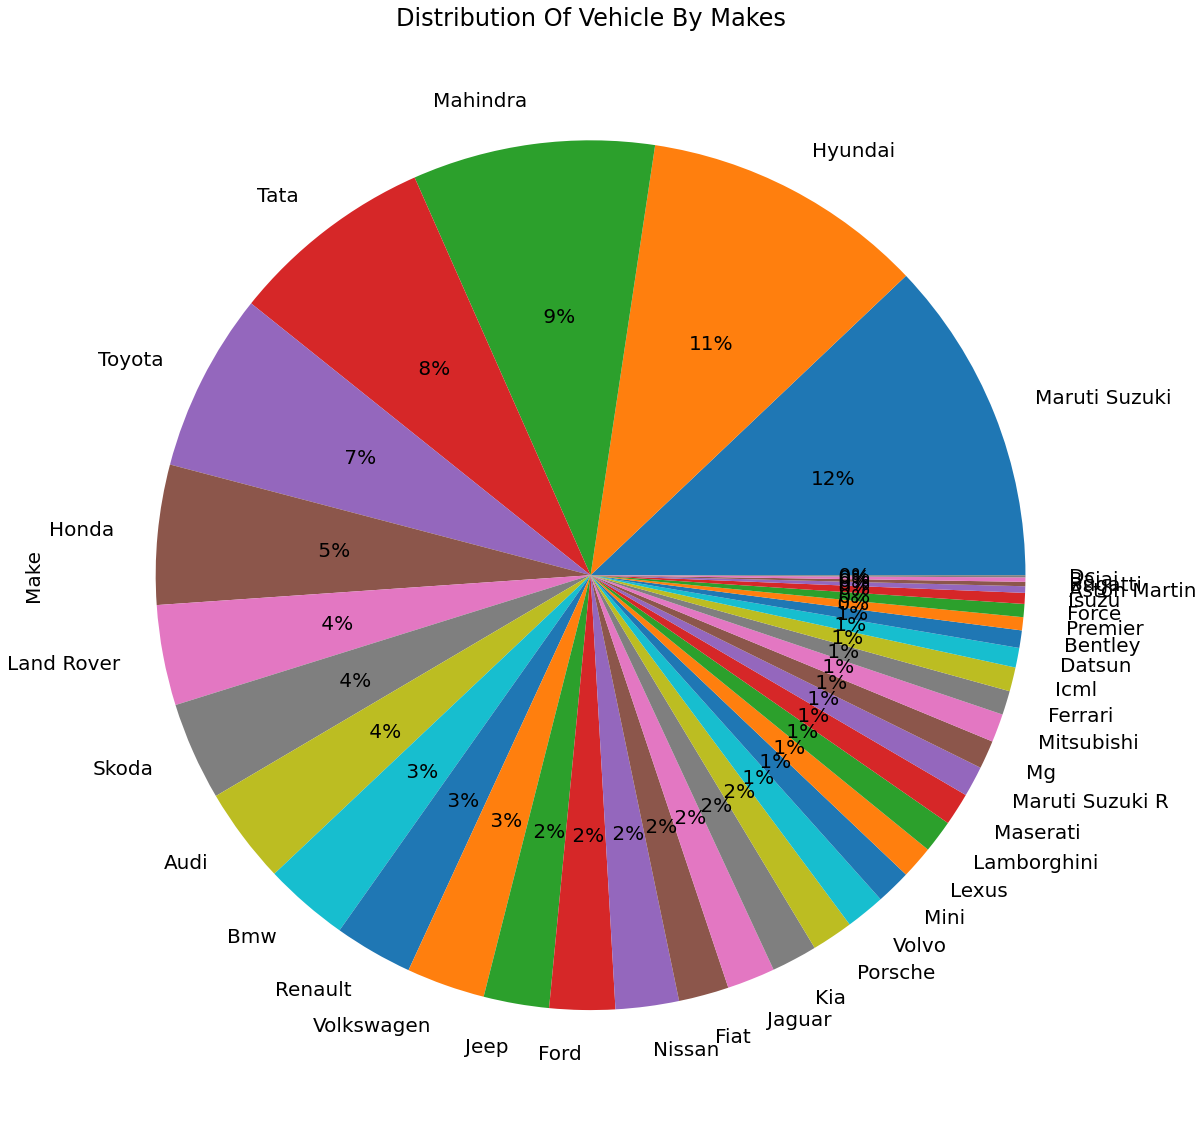

<Figure size 432x288 with 0 Axes>

In [58]:
cars_new['Make'].value_counts().plot(kind='pie',autopct='%2.0f%%',figsize=(20, 20))
plt.title('Distribution Of Vehicle By Makes')
plt.show()
plt.rcParams['font.size'] = 30
plt.savefig('Distribution Of Vehicle By Makes.jpg',bbox_inches='tight')

In [55]:
(cars_new['Make'] == 'Maruti Suzuki').sum()    #counting the number of cars produced by Maruti Suzuki

149

In [56]:
(cars_new['Make'] == 'Bugatti').sum()           #counting the number of cars produced by Bugatti

2

In [59]:
pd.crosstab(cars_new.Make, cars_new.Doors, margins=True, margins_name="Total")

Doors,2.0,3.0,4.0,5.0,Total
Make,,,,,
Aston Martin,2,0,1,0,3
Audi,5,0,17,22,44
Bajaj,0,0,2,0,2
Bentley,2,0,3,3,8
Bmw,4,0,13,22,39
Bugatti,2,0,0,0,2
Datsun,0,0,0,9,9
Dc,1,0,0,0,1
Ferrari,9,0,2,0,11


In [60]:
pd.crosstab(cars_new.Make, cars_new.Body_Type)

Body_Type,Convertible,Coupe,"Coupe, Convertible",Crossover,"Crossover, SUV",Hatchback,MPV,MUV,Pick-up,SUV,"SUV, Crossover",Sedan,"Sedan, Coupe","Sedan, Crossover",Sports,"Sports, Convertible","Sports, Hatchback"
Make,,,,,,,,,,,,,,,,,
Aston Martin,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Audi,2,3,0,0,0,0,4,0,0,17,0,17,1,0,0,0,0
Bajaj,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
Bentley,0,2,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0
Bmw,0,2,0,0,2,0,1,2,0,12,2,16,0,0,0,2,0
Bugatti,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Datsun,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
Dc,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ferrari,1,7,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [62]:
pd.crosstab(cars_new.Make, cars_new.Type, normalize=True)

Type,AMT,Automatic,CVT,DCT,Manual
Make,,,,,
Aston Martin,0.000000,0.002417,0.000000,0.000000,0.000000
Audi,0.000000,0.033038,0.000000,0.001612,0.000806
Bajaj,0.000000,0.000000,0.000000,0.000000,0.001612
Bentley,0.000000,0.006446,0.000000,0.000000,0.000000
Bmw,0.000000,0.031426,0.000000,0.000000,0.000000
Bugatti,0.000000,0.001612,0.000000,0.000000,0.000000
Datsun,0.000000,0.000000,0.000000,0.000000,0.007252
Dc,0.000000,0.000000,0.000000,0.000000,0.000806
Ferrari,0.000000,0.008864,0.000000,0.000000,0.000000


This table shows us that 3.3% of the total population are Audi Automatic and 7.74% are Mahindra Manual.

In [64]:
pd.crosstab(cars_new.Make, cars_new.Body_Type, normalize='columns')

Body_Type,Convertible,Coupe,"Coupe, Convertible",Crossover,"Crossover, SUV",Hatchback,MPV,MUV,Pick-up,SUV,"SUV, Crossover",Sedan,"Sedan, Coupe","Sedan, Crossover",Sports,"Sports, Convertible","Sports, Hatchback"
Make,,,,,,,,,,,,,,,,,
Aston Martin,0.00,0.050,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.003125,0.0,0.0,0.000000,0.0,0.0
Audi,0.10,0.075,0.0,0.000000,0.0,0.000000,0.117647,0.000000,0.0,0.037528,0.0,0.053125,0.5,0.0,0.000000,0.0,0.0
Bajaj,0.00,0.000,0.0,0.000000,0.0,0.006579,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Bentley,0.00,0.050,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.006623,0.0,0.009375,0.0,0.0,0.000000,0.0,0.0
Bmw,0.00,0.050,0.0,0.000000,1.0,0.000000,0.029412,0.057143,0.0,0.026490,1.0,0.050000,0.0,0.0,0.000000,1.0,0.0
Bugatti,0.00,0.000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.0,0.0
Datsun,0.00,0.000,0.0,0.000000,0.0,0.029605,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Dc,0.00,0.025,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Ferrari,0.05,0.175,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.006250,0.0,0.0,0.000000,0.0,0.0


Looking at just the convertible column, you can see that 25% of the convertibles are made by Lamborghini , 20% by Jaguar, 10% by Porsche, Jeep, Audi and 5% by Mini, Maserati,  Lexus, Ferrari	and Land Rover

In [67]:
pd.crosstab(cars_new.Make, cars_new.Body_Type, normalize='index')

Body_Type,Convertible,Coupe,"Coupe, Convertible",Crossover,"Crossover, SUV",Hatchback,MPV,MUV,Pick-up,SUV,"SUV, Crossover",Sedan,"Sedan, Coupe","Sedan, Crossover",Sports,"Sports, Convertible","Sports, Hatchback"
Make,,,,,,,,,,,,,,,,,
Aston Martin,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0000
Audi,0.045455,0.068182,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.386364,0.000000,0.386364,0.022727,0.000000,0.000000,0.000000,0.0000
Bajaj,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Bentley,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.375000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.0000
Bmw,0.000000,0.051282,0.000000,0.000000,0.051282,0.000000,0.025641,0.051282,0.0,0.307692,0.051282,0.410256,0.000000,0.000000,0.000000,0.051282,0.0000
Bugatti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000
Datsun,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Dc,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Ferrari,0.090909,0.636364,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.0000


This view of the data shows that of the Aston Martin cars in this dataset, 66.67% are Coupe and the remainder (33.33%) are sedans.

In [76]:
cars_new[cars_new['Body_Type']=='Sedan']

,Make,Model,Variant,Price,City_Mileage,Cylinders,Highway_Mileage,Drivetrain,Emission_Norm,Fuel_Type,...,Ground_Clearance,Power_Steering,Power,Doors,Type,Audiosystem,Aux-in_Compatibility,Boot_Space,Child_Safety_Locks,Number_of_Airbags
112,Hyundai,Xcent Prime,Cng T + (Cng +,556130,17.57,4.0,23.08,FWD (Front Wheel Drive),BS IV,CNG + Petrol,...,165.0,Electric Power,83PS@6000rpm,4.0,Manual,Not on offer,Yes,407,Yes,2.0
113,Hyundai,Xcent Prime,T,536859,17.57,4.0,23.08,FWD (Front Wheel Drive),BS IV,Petrol,...,165.0,Electric Power,83PS@6000rpm,4.0,Manual,Not on offer,Yes,407,Yes,2.0
114,Hyundai,Xcent Prime,T+,556130,17.57,4.0,15.70,FWD (Front Wheel Drive),BS IV,Petrol,...,165.0,Electric Power,83PS@6000rpm,4.0,Manual,Not on offer,Yes,407,Yes,2.0
115,Hyundai,Xcent Prime,Cng T (Cng +,536859,17.57,4.0,15.70,FWD (Front Wheel Drive),BS IV,CNG + Petrol,...,165.0,Electric Power,81.8bhp@6000rpm,4.0,Manual,Not on offer,Yes,407,Yes,2.0
116,Hyundai,Xcent Prime,T+ Crdi,639616,17.57,4.0,15.70,FWD (Front Wheel Drive),BS IV,Diesel,...,165.0,Electric Power,70bhp@4000RPM,4.0,Manual,Not on offer,Yes,407,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Honda,City,V Mt Diesel,1191000,22.60,4.0,25.60,FWD (Front Wheel Drive),BS IV,Diesel,...,165.0,Electric Power,100PS@3600rpm,4.0,Manual,CD Player with USB & Aux-in,Yes,510,Yes,2.0
1271,Honda,City,Vx Mt Diesel,1302000,22.60,4.0,25.10,FWD (Front Wheel Drive),BS IV,Diesel,...,165.0,Electric Power,100PS@3600rpm,4.0,Manual,DVD Player with USB & Aux-in,Yes,510,Yes,2.0
1272,Honda,City,Zx Mt Diesel,1421000,22.60,4.0,25.10,FWD (Front Wheel Drive),BS IV,Diesel,...,165.0,Electric Power,100PS@3600rpm,4.0,Manual,DVD Player with USB & Aux-in,Yes,510,Yes,6.0
1273,Honda,City,Zx Cvt Petrol,1431000,18.00,4.0,18.00,FWD (Front Wheel Drive),BS VI,Petrol,...,165.0,Electric Power,119PS@6600rpm,4.0,Automatic,DVD Player with USB & Aux-in,Yes,510,Yes,6.0


In [64]:
group = cars_new[['Drivetrain','Ex-Showroom_Price']]
group_result = group.groupby(['Drivetrain'],as_index= False).mean()
group_result

,Drivetrain,Ex-Showroom_Price
0,4WD,1.216533e+07
1,AWD (All Wheel Drive),1.462547e+07
2,FWD (Front Wheel Drive),1.228400e+06
3,RWD (Rear Wheel Drive),1.064418e+07


<AxesSubplot:xlabel='Emission_Norm', ylabel='Fuel_Type'>

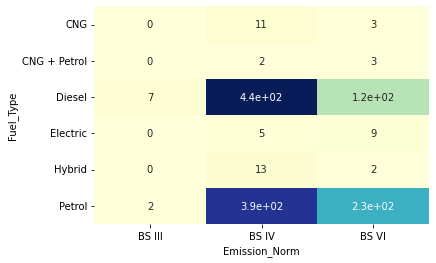

In [81]:
sns.heatmap(pd.crosstab([cars_new.Fuel_Type], [cars_new.Emission_Norm]),
            cmap="YlGnBu", annot=True, cbar=False)

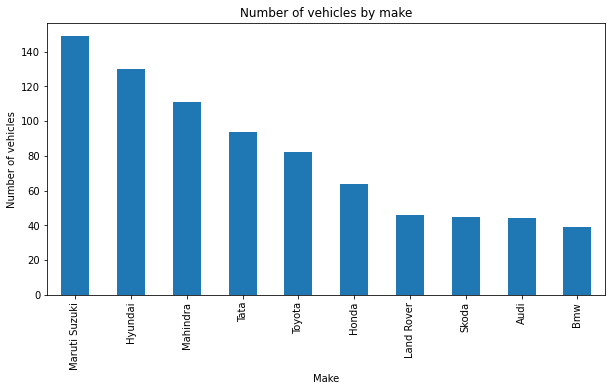

In [57]:
cars_new.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

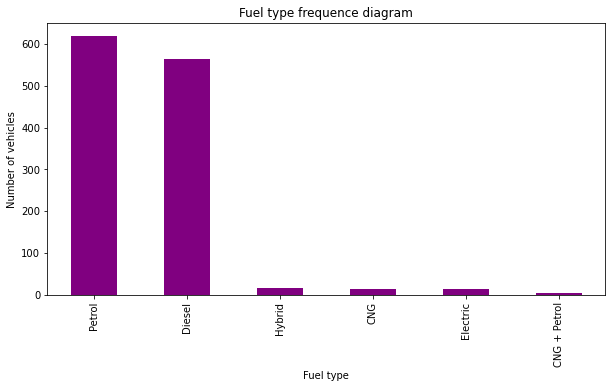

In [58]:
cars_new['Fuel_Type'].value_counts().plot(kind='bar',color='purple',figsize=(10,5))
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

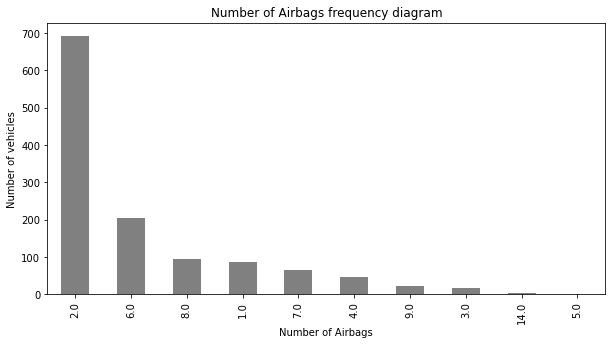

In [59]:
cars_new['Number_of_Airbags'].value_counts().plot(kind='bar',color='grey',figsize=(10,5))
plt.title("Number of Airbags frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of Airbags');

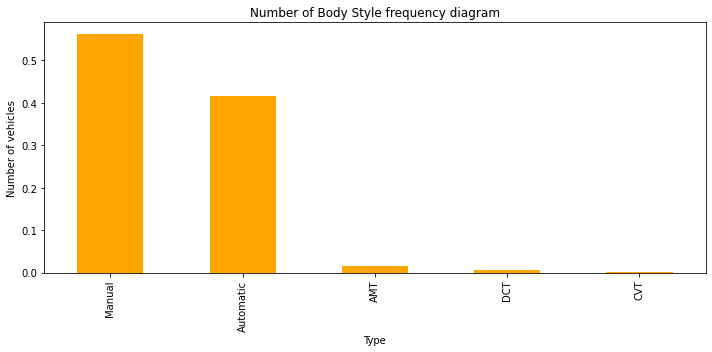

In [60]:
cars_new['Type'].value_counts(normalize=True).plot(figsize=(10,5),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Type');
plt.tight_layout()
plt.show()

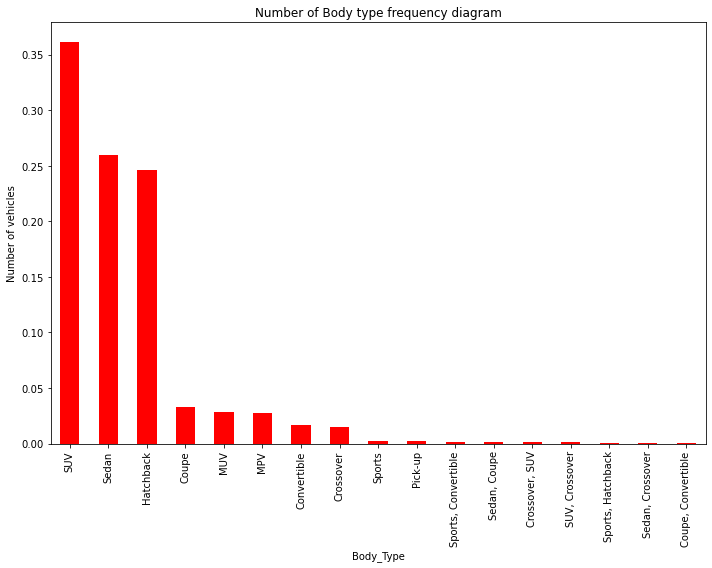

In [61]:
cars_new['Body_Type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Body type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Body_Type');
plt.tight_layout()
plt.show()

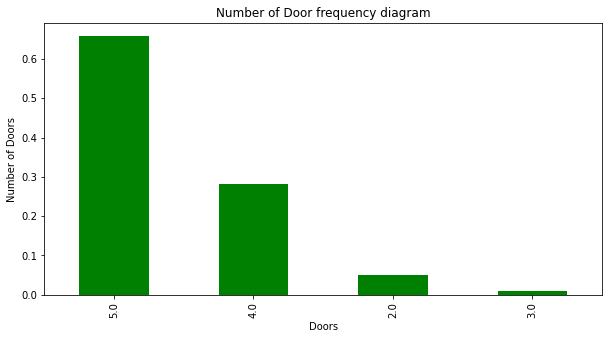

In [62]:

cars_new['Doors'].value_counts(normalize=True).plot(figsize=(10,5),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('Doors');

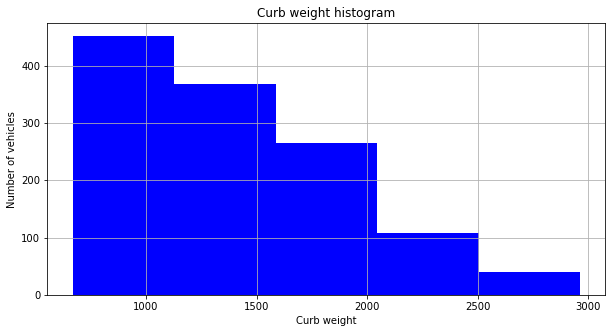

In [63]:
cars_new['Kerb_Weight'].hist(bins=5,color='blue',figsize=(10,5));
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

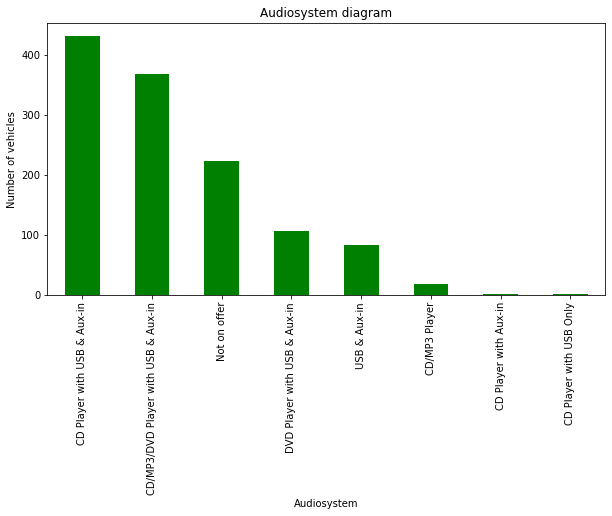

In [64]:
cars_new['Audiosystem'].value_counts().plot(kind='bar',color='green',figsize=(10,5))
plt.title("Audiosystem diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Audiosystem');
plt.rcParams['font.size'] = 2

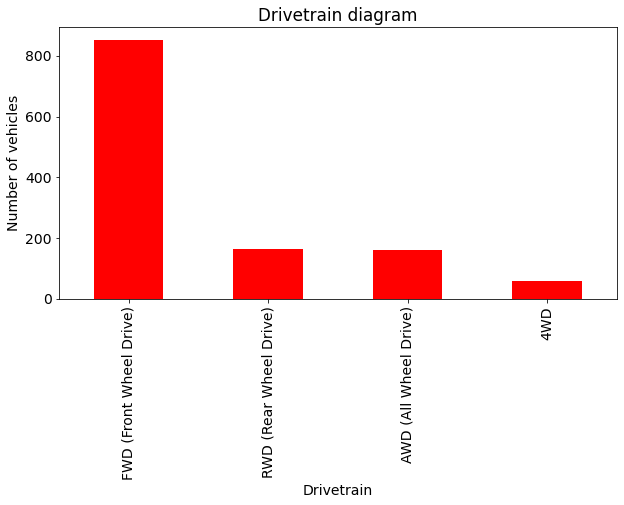

In [66]:
cars_new['Drivetrain'].value_counts().plot(kind='bar',color='red',figsize=(10,5))
plt.title("Drivetrain diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drivetrain');
plt.rcParams['font.size'] = 20

From our data, it seems All-wheel drive vehicles are, on average, the most expensive.

Text(0.5, 1.0, 'CountPlot for Gears')

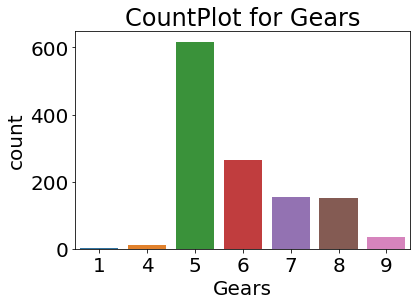

In [69]:
sns.countplot('Gears',data=cars_new)
plt.title('CountPlot for Gears')

Text(0.5, 1.0, 'Price vs Fuel Type')

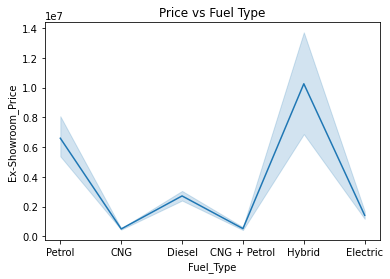

In [114]:
sns.lineplot(x=cars_new['Fuel_Type'],y=cars_new['Ex-Showroom_Price'])
plt.title('Price vs Fuel Type')

Text(0.5, 1.0, 'Price vs Type')

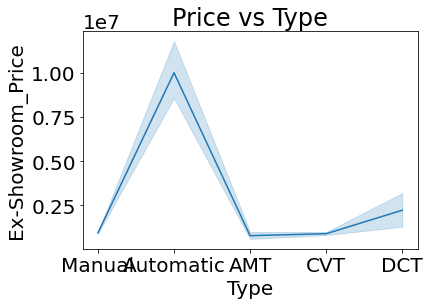

In [71]:
sns.lineplot(x=cars_new['Type'],y=cars_new['Ex-Showroom_Price'])
plt.title('Price vs Type')

Text(0.5, 1.0, 'Price vs Kerb Weight')

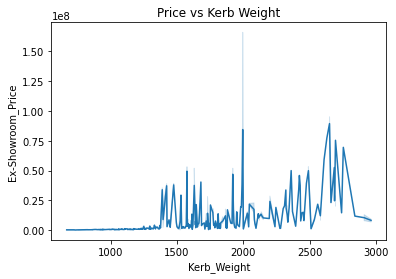

In [116]:
sns.lineplot(x=cars_new['Kerb_Weight'],y=cars_new['Ex-Showroom_Price'])
plt.title('Price vs Kerb Weight')

Text(0.5, 1.0, 'Price vs Drivetrain')

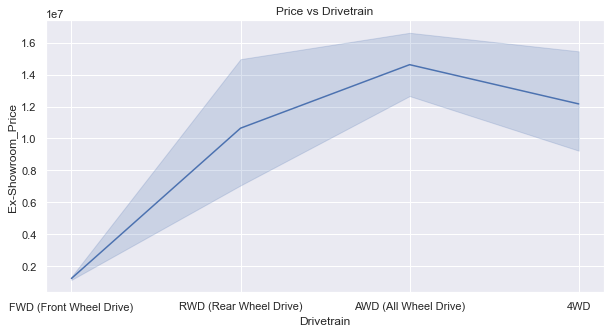

In [93]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x=cars_new['Drivetrain'],y=cars_new['Ex-Showroom_Price'])
plt.title('Price vs Drivetrain')

Text(0.5, 1.0, 'Make vs Highway_Mileage')

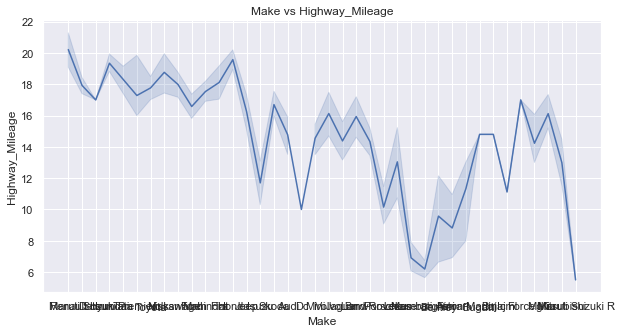

In [94]:
sns.lineplot(y=cars_new['Highway_Mileage'],x=cars_new['Make'])
sns.set(rc={'figure.figsize':(55,5)})
plt.title('Make vs Highway_Mileage')


**Findings**

We have taken some key features of the automobile dataset for this analysis and below are our findings.
1. Maruti Suzuki is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Hyundai.
2. Maruti Suzuki and Hyundai produces frequently while Dc, Aston Martin, Bugatti etc don't.
3. Most preferred fuel type for the customer is Petrol having more than 90% of the choice.
4. More Cars consist of 2 Airbags
5. Most of the Cars are Manual and then followed by Automatic
6. Company produces more SUV than Sedan and Hatchback. This means people choose more SUV.
7. 67% of the cars has 5 doors.
8. Curb weight of the cars are distributed between 1000 and 3000 approximately.
9. For drive wheels, front wheel drive has most number of cars followed by rear wheel and all wheel. There are very less number    of cars for four wheel drive.
10. From our data, it seems All-wheel drive vehicles are, on average, the most expensive.
11. Diesel has High emission Norm of Base 4 than petrol.
12. Cars having hybrid mode of fuel is costlier than cars running on Petrol.
13. Automatic cars are expensive than Manual.

# Conclusion

We now have a better idea of what our data looks like and which variables are important to take into account when predicting 
the car price. We have narrowed it down to the following variables:

 - Kerb_Weight<br>
 - Highway_Mileage<br>
 - Drivetrain<br>
 - Car Type(Automatic or Manual)<br>
 - Fuel Type